### Problem Statement
In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.
A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.
Download 'nba_2013.csv'

In [1]:
# -*- coding: utf-8 -*-
"""
Created in Aug 2020 
@author: Anash
"""

#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Import dataset
nba = pd.read_csv("https://raw.githubusercontent.com/anash963/DataSets/master/nba_2013.csv")

In [6]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [7]:
#Droping the last two unnecessary columns
nba = nba.iloc[:,1:29]

In [8]:
nba.head()

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,TOT,63,0,847,66,141,0.468,4,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,OKC,81,20,1197,93,185,0.503,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,TOT,53,12,961,143,275,0.520,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,ORL,73,73,2552,464,1011,0.459,128,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,NOP,56,30,951,136,249,0.546,0,...,0.836,94,183,277,40,23,46,63,187,328


In [9]:
#Drop brief_team_Id column too
nba = nba.drop("bref_team_id", axis =1)

In [10]:
nba.head()

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,63,0,847,66,141,0.468,4,15,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,81,20,1197,93,185,0.503,0,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,53,12,961,143,275,0.520,0,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,73,73,2552,464,1011,0.459,128,300,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,56,30,951,136,249,0.546,0,1,...,0.836,94,183,277,40,23,46,63,187,328


In [11]:
#Assigning the ddependant and independant variables
X = nba.iloc[:,:-1].values
y = nba.iloc[:,-1].values

In [13]:
!pip install sklearn

In [15]:
import sklearn.preprocessing

In [20]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X[:,[7,10,13,14,17]])
X[:,[7,10,13,14,17]] = imputer.transform(X[:,[7,10,13,14,17]])

In [21]:
nba.head()

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,63,0,847,66,141,0.468,4,15,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,81,20,1197,93,185,0.503,0,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,53,12,961,143,275,0.520,0,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,73,73,2552,464,1011,0.459,128,300,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,56,30,951,136,249,0.546,0,1,...,0.836,94,183,277,40,23,46,63,187,328


In [23]:
#Label encoding categorical value
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])],     remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)

In [29]:
#Implementing dummy trap
X= X[:,1:]

In [31]:
#Splitting the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [32]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [33]:
#Applying Algorithm KNN to the training dataset
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsRegressor(n_neighbors=5, metric= "minkowski", p =2)
classifier.fit(X_train, y_train)

KNeighborsRegressor()

In [34]:
#Predicting the test data
y_pred = classifier.predict(X_test)

Text(0.5, 1.0, 'Actual Pts vs Predicted Pts')

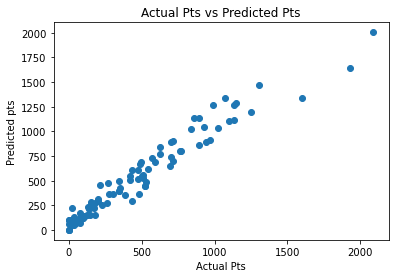

In [35]:
#Plotting the scatter plots
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Pts")
plt.ylabel("Predicted pts")
plt.title("Actual Pts vs Predicted Pts")

### Problem Statement 

In this assignment students have to find the frequency of words in a
webpage. User can use urllib and BeautifulSoup to extract text from
webpage.

In [1]:
from bs4 import BeautifulSoup
import urllib.request
import nltk

In [2]:
#nltk.download()
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

text = soup.get_text(strip=True)

In [5]:
#convert that text into tokens by splitting 
tokens = [t for t in text.split()]
#tokens = word_tokenize(text)
clean_tokens = tokens[:] 
sr = stopwords.words('english') 
for token in tokens: 
    if token in stopwords.words('english'): 
        clean_tokens.remove(token)

In [10]:
#calculate the frequency of those tokens using Python NLTK.
freq = nltk.FreqDist(tokens) 
for key,val in freq.items(): 
    print (str(key) + ' : ' + str(val))
    


PHP: : 1
Hypertext : 1
PreprocessorDownloadsDocumentationGet : 1
InvolvedHelpGetting : 1
StartedIntroductionA : 1
simple : 1
tutorialLanguage : 1
ReferenceBasic : 1
syntaxTypesVariablesConstantsExpressionsOperatorsControl : 1
StructuresFunctionsClasses : 1
and : 111
ObjectsNamespacesErrorsExceptionsGeneratorsReferences : 1
ExplainedPredefined : 1
VariablesPredefined : 1
ExceptionsPredefined : 1
Interfaces : 1
ClassesContext : 1
options : 1
parametersSupported : 1
Protocols : 1
WrappersSecurityIntroductionGeneral : 1
considerationsInstalled : 1
as : 2
CGI : 1
binaryInstalled : 1
an : 21
Apache : 1
moduleSession : 1
SecurityFilesystem : 1
SecurityDatabase : 1
SecurityError : 1
ReportingUsing : 1
Register : 1
GlobalsUser : 1
Submitted : 1
DataMagic : 1
QuotesHiding : 1
PHPKeeping : 1
CurrentFeaturesHTTP : 1
authentication : 1
with : 3
PHPCookiesSessionsDealing : 1
XFormsHandling : 1
file : 1
uploadsUsing : 1
remote : 1
filesConnection : 1
handlingPersistent : 1
Database : 1
ConnectionsSaf

AttributeError: 'int' object has no attribute 'sort'

In [14]:
#Printing the top 5 words with their frequency
freq = nltk.FreqDist(tokens)
for word, frequency in freq.most_common(5):
    print(u'{}; {}'.format(word, frequency)) 

PHP; 223
the; 210
of; 165
release; 158
for; 134


# Problem Statement
In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

In [35]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [36]:
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv')

  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3


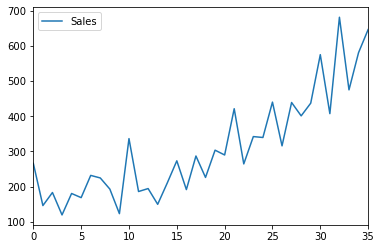

In [37]:
print(df.head())
series.plot()
pyplot.show()

In [38]:
df.head

<bound method NDFrame.head of    Month  Sales
0   1-01  266.0
1   1-02  145.9
2   1-03  183.1
3   1-04  119.3
4   1-05  180.3
5   1-06  168.5
6   1-07  231.8
7   1-08  224.5
8   1-09  192.8
9   1-10  122.9
10  1-11  336.5
11  1-12  185.9
12  2-01  194.3
13  2-02  149.5
14  2-03  210.1
15  2-04  273.3
16  2-05  191.4
17  2-06  287.0
18  2-07  226.0
19  2-08  303.6
20  2-09  289.9
21  2-10  421.6
22  2-11  264.5
23  2-12  342.3
24  3-01  339.7
25  3-02  440.4
26  3-03  315.9
27  3-04  439.3
28  3-05  401.3
29  3-06  437.4
30  3-07  575.5
31  3-08  407.6
32  3-09  682.0
33  3-10  475.3
34  3-11  581.3
35  3-12  646.9>

In [39]:
df['Date']=pd.to_datetime('190'+df.Month,format='%Y-%m')

In [40]:
df.head

<bound method NDFrame.head of    Month  Sales       Date
0   1-01  266.0 1901-01-01
1   1-02  145.9 1901-02-01
2   1-03  183.1 1901-03-01
3   1-04  119.3 1901-04-01
4   1-05  180.3 1901-05-01
5   1-06  168.5 1901-06-01
6   1-07  231.8 1901-07-01
7   1-08  224.5 1901-08-01
8   1-09  192.8 1901-09-01
9   1-10  122.9 1901-10-01
10  1-11  336.5 1901-11-01
11  1-12  185.9 1901-12-01
12  2-01  194.3 1902-01-01
13  2-02  149.5 1902-02-01
14  2-03  210.1 1902-03-01
15  2-04  273.3 1902-04-01
16  2-05  191.4 1902-05-01
17  2-06  287.0 1902-06-01
18  2-07  226.0 1902-07-01
19  2-08  303.6 1902-08-01
20  2-09  289.9 1902-09-01
21  2-10  421.6 1902-10-01
22  2-11  264.5 1902-11-01
23  2-12  342.3 1902-12-01
24  3-01  339.7 1903-01-01
25  3-02  440.4 1903-02-01
26  3-03  315.9 1903-03-01
27  3-04  439.3 1903-04-01
28  3-05  401.3 1903-05-01
29  3-06  437.4 1903-06-01
30  3-07  575.5 1903-07-01
31  3-08  407.6 1903-08-01
32  3-09  682.0 1903-09-01
33  3-10  475.3 1903-10-01
34  3-11  581.3 1903-11-0

In [41]:
df['Date']=pd.to_datetime('190'+df.Month,format='%Y-%m')

In [42]:
df.head()

,Month,Sales,Date
0,1-01,266.0,1901-01-01
1,1-02,145.9,1901-02-01
2,1-03,183.1,1901-03-01
3,1-04,119.3,1901-04-01
4,1-05,180.3,1901-05-01


In [43]:
df=df.drop(columns=['Month'])
df.head()

,Sales,Date
0,266.0,1901-01-01
1,145.9,1901-02-01
2,183.1,1901-03-01
3,119.3,1901-04-01
4,180.3,1901-05-01


In [44]:
df.set_index('Date',inplace=True)

In [45]:
df.head()

,Sales
Date,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


#### 1. Reading data, datetime index

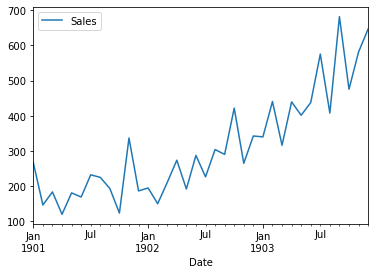

In [49]:
df.plot()
pyplot.show()

#### 2. Autocorrelation plot

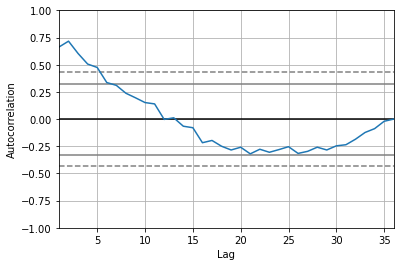

In [58]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
pyplot.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

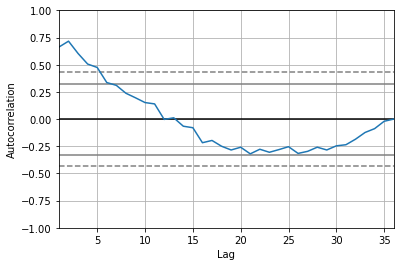

In [61]:
pd.plotting.autocorrelation_plot(df)

There is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags.

A good starting point for the AR parameter of the model may be 5.

#### 3. ARIMA with Python
The statsmodels library provides the capability to fit an ARIMA model.

An ARIMA model can be created using the statsmodels library as follows:

Define the model by calling ARIMA() and passing in the p, d, and q parameters.
The model is prepared on the training data by calling the fit() function.
Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.
First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

C:\Users\anash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\anash\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Thu, 13 Aug 2020   AIC                            406.340
Time:                        08:55:05   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

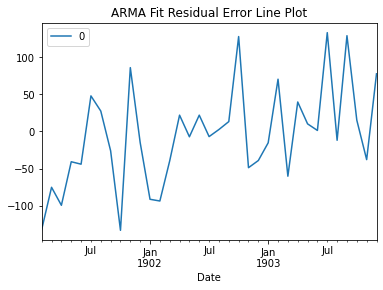

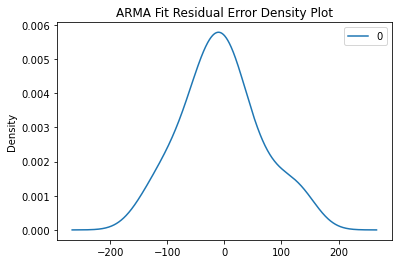

                0
count   35.000000
mean    -5.495238
std     68.132880
min   -133.296630
25%    -42.477921
50%     -7.186626
75%     24.748307
max    133.237939


In [63]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.title('ARMA Fit Residual Error Line Plot')
pyplot.show()

residuals.plot(kind='kde')
pyplot.title('ARMA Fit Residual Error Density Plot')
pyplot.show()
print(residuals.describe())

#### 4. Rolling Forecast ARIMA Model

predicted=349.117722, expected=342.300000
predicted=306.512964, expected=339.700000
predicted=387.376414, expected=440.400000
predicted=348.154216, expected=315.900000
predicted=386.308824, expected=439.300000
predicted=356.082062, expected=401.300000
predicted=446.379463, expected=437.400000
predicted=394.737285, expected=575.500000
predicted=434.915588, expected=407.600000
predicted=507.923460, expected=682.000000
predicted=435.482959, expected=475.300000
predicted=652.743785, expected=581.300000
predicted=546.343500, expected=646.900000
Test MSE: 6958.324


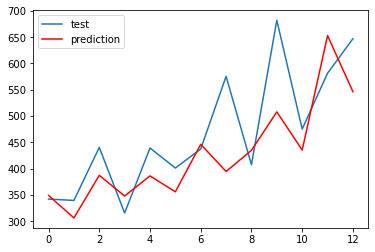

In [64]:
from sklearn.metrics import mean_squared_error

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.legend(['test','prediction'])
pyplot.show()